# Лабораторная работа 1
выполнила Карасева Екатерина M33351

## Непараметрическая регрессия

Цели работы:
- практика первичных навыков обработки данных: нормализация, One-Hot преобразование;
- сведение задачи классификации к задаче непараметрической регрессии;
- реализация решения задачи непараметрической регрессии ядерным сглаживанием Надарая Ватсона;
- практика наивного способа настройки и анализа гиперпараметров модели, решающей задачу непараметрической регрессии.

Выбранный набор данных:
- [car](https://www.openml.org/d/40975)

In [163]:
import pandas as pd

ds = pd.read_csv('dataset_54_vehicle.csv')
ds.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


### Сведение к задаче регрессии и обработка данных
Перейдите от задачи классификации к задаче регрессии, используя OneHot преобразование.
Вместо одного целевого признака в выбранный набор данных добавляется столько новых числовых переменных,
сколько в нём содержится классов. Помимо этого, если выбранный Вами набор данных содержит нечисловые признаки,
эти признаки необходимо векторизовать (перейти от категорий к числам), заполнить пропуски (если есть) и нормализовать.
В наборе данных bridges также необходимо избавиться от столбца IDENTIF, поскольку он является идентификатором записи.

In [164]:
dictionary = {
    'opel': '0 0 0 1',
    'saab': '0 0 1 0',
    'bus': '0 1 0 0',
    'van': '1 0 0 0'
}

ds.Class = ds.Class.apply(lambda c: dictionary[c])

In [165]:
# one-hot
ds['col1'] = ds.Class.str.split(' ').str.get(0).apply(int)
ds['col2'] = ds.Class.str.split(' ').str.get(1).apply(int)
ds['col3'] = ds.Class.str.split(' ').str.get(2).apply(int)
ds['col4'] = ds.Class.str.split(' ').str.get(3).apply(int)
ds = ds.drop(columns='Class')
ds.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,...,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,col1,col2,col3,col4
0,95,48,83,178,72,10,162,42,20,159,...,184,70,6,16,187,197,1,0,0,0
1,91,41,84,141,57,9,149,45,19,143,...,158,72,9,14,189,199,1,0,0,0
2,104,50,106,209,66,10,207,32,23,158,...,220,73,14,9,188,196,0,0,1,0
3,93,41,82,159,63,9,144,46,19,143,...,127,63,6,10,199,207,1,0,0,0
4,85,44,70,205,103,52,149,45,19,144,...,188,127,9,11,180,183,0,1,0,0


In [180]:
# normalise
import numpy as np

def normalise(arr):
    min = np.min(arr)
    max = np.max(arr)
    return arr.apply(lambda x: (x - min) / (max - min))


for i in ds.columns:
    ds[i] = normalise(ds[i])
ds.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,...,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,col1,col2,col3,col4
0,0.478261,0.576923,0.597222,0.323144,0.274725,0.150943,0.326797,0.457143,0.250000,0.585714,...,0.471698,0.144737,0.272727,0.390244,0.366667,0.533333,1.0,0.0,0.0,0.0
1,0.391304,0.307692,0.611111,0.161572,0.109890,0.132075,0.241830,0.542857,0.166667,0.357143,...,0.308176,0.171053,0.409091,0.341463,0.433333,0.600000,1.0,0.0,0.0,0.0
2,0.673913,0.653846,0.916667,0.458515,0.208791,0.150943,0.620915,0.171429,0.500000,0.571429,...,0.698113,0.184211,0.636364,0.219512,0.400000,0.500000,0.0,0.0,1.0,0.0
3,0.434783,0.307692,0.583333,0.240175,0.175824,0.132075,0.209150,0.571429,0.166667,0.357143,...,0.113208,0.052632,0.272727,0.243902,0.766667,0.866667,1.0,0.0,0.0,0.0
4,0.260870,0.423077,0.416667,0.441048,0.615385,0.943396,0.241830,0.542857,0.166667,0.371429,...,0.496855,0.894737,0.409091,0.268293,0.133333,0.066667,0.0,1.0,0.0,0.0


In [167]:
# признаки и таргет
x = ds.drop(columns=['col1', 'col2', 'col3', 'col4']).head(100)
y = ds[['col1', 'col2', 'col3', 'col4']].head(100)

### Реализация алгоритма

Реализуйте алгоритм решения задачи непареметрической регрессии при помощи ядерного сглаживания Надарая-Ватсона.

In [168]:
def non_param_regh(x, train_x, train_y, k, ro, h):
    sum1 = [0, 0, 0, 0]
    sum2 = 0
    for i in range(0, train_x.shape[0]):
        sum1 += train_y[i] * k(ro(train_x[i], x) / h(train_x[i]))
        sum2 += k(ro(train_x[i], x) / h(train_x[i]))
    return sum1 / sum2

### Настройка гиперпараметров

Найдите лучшую комбинацию гиперпараметров алгоритма непараметрической регрессии:

In [169]:
# функция ядра
funK = [lambda u: 1 / 2,  # uniform
        lambda u: (1 - np.abs(u)),  # triangular
        lambda u: (3 / 4) * (1 - u * u),  # epanechnikov
        lambda u: (15 / 16) * (1 - u * u) * (1 - u * u)  # quartic
        ]

funRo = [lambda x1, x2: np.sqrt(np.sum(np.square(x1 - x2))),  # расстояние Евклида
         lambda x1, x2: np.sum(np.abs(x1 - x2)),  # расстояние Манхэттена
         lambda x1, x2: np.max(np.abs(x1 - x2))  # расстояние Чебышева
         ]

import itertools

def leave_one_out(k, ro, h):
    f_measure = 0
    for i in range(0, x.shape[0]):
        train_x = x.drop(i, axis=0)
        train_y = y.drop(i, axis=0)
        if numpy_y[i][np.argmax(non_param_regh(numpy_x[i], train_x.to_numpy(), train_y.to_numpy(), k, ro, h))] == 1 :
            f_measure += 1
    return f_measure/x.shape[0]

numpy_x = x.to_numpy()
numpy_y = y.to_numpy()

def select_param():
    maxF = 0
    bestK = 0
    bestRo = 0
    bestTypeH = 'fixed'
    bestH = -1
    for i in range(0, len(funRo)):
        print(i)
        for j in range(0, len(funK)):
            # print(j)
            # окно, зависящее от количества соседей
            k = 1
            while k < np.sqrt(numpy_x.shape[0]):
                # print('k = ' + str(k))
                h = lambda x1: sorted(map(lambda k: funRo[i](k, x1), numpy_x))[k]
                cur = leave_one_out(funK[j], funRo[i], h)
                if maxF < cur:
                    bestK = j
                    bestRo = i
                    bestTypeH = 'neighbors'
                    bestH = k
                    maxF = cur
                k += 1
            # фиксированное окно
            r = np.max(list(map(lambda p: funRo[i](p[0], p[1]), itertools.product(numpy_x, numpy_x))))
            h = r / np.sqrt(numpy_x.shape[0])
            while h < r:
                # print('h = ' + str(h))
                cur = leave_one_out(funK[j], funRo[i], lambda x1: h)
                if maxF < cur:
                    bestK = j
                    bestRo = i
                    bestTypeH = 'fixed'
                    bestH = h
                    maxF = cur
                h += r / np.sqrt(numpy_x.shape[0])
    return [maxF, bestK, bestRo, bestTypeH, bestH]

result = select_param()

# y1 = np.array([[0, 0, 0, 1], [1, 0, 0, 0], [0, 1, 0, 0]])
# x1 = np.array([[0.5, 1, 0.7, 1, 1], [0.8, 0.2, 0.6, 0.5, 0.9], [0.1, 1, 0.4, 0, 0.8]])
#
# res = non_param_regh(np.array((0.8, 0.5, 0.1, 0.3, 1)), x1, y1, funK[0], funRo[0], lambda x4: 1)

0
1
2


In [181]:
funKName = ['uniform', 'triangular', 'epanechnikov', 'quartic']
funRoName = ['расстояние Евклида', 'расстояние Манхэттена', 'расстояние Чебышева']
print('best f_measure = ' + str(result[0]))
print('best K function = ' + funKName[result[1]])
print('best Ro function = ' + funRoName[result[2]])
print('best window type = ' + result[3])
print('window ' + str(result[4]))

best f_measure = 0.43
best K function = triangular
best Ro function = расстояние Чебышева
best window type = fixed
window 0.8999999999999999


In [171]:
f_values = []
r = np.max(list(map(lambda p: funRo[result[2]](p[0], p[1]), itertools.product(numpy_x, numpy_x))))
h = r / np.sqrt(numpy_x.shape[0])
while h < r:
    f_values.append(leave_one_out(funK[result[1]], funRo[result[2]], lambda x1: h))
    h += r / np.sqrt(numpy_x.shape[0])

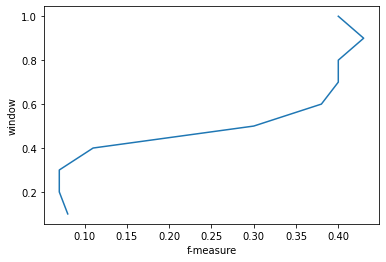

In [172]:
import math
import matplotlib.pyplot as plt

sqrt = math.sqrt(len(x))
hs = range (1, round(sqrt) + 1)
hs = hs * r / sqrt

plt.plot(f_values, hs)
plt.xlabel("f-measure")
plt.ylabel("window")
plt.show()